In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
total_plataformas = pd.read_csv('totalplataformas.csv', delimiter=',', encoding='utf-8')
total_rating= pd.read_csv('ratin_total.csv', delimiter=',', encoding='utf-8')

In [3]:
total_plataformas.head()

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,ns1,s1,movie,dick johnson is dead,kirsten johnson,NaN,united states,2021-09-25,2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm...",90.0,min
1,ns2,s2,tv show,blood & water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",2.0,season
2,ns3,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",NaN,2021-09-24,2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,1.0,season
3,ns4,s4,tv show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,tv-ma,1 season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo...",1.0,season
4,ns5,s5,tv show,kota factory,NaN,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,2 seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...,2.0,season


In [4]:
# Uno los dos dataframes vinculando los id
df_completo = pd.merge(total_plataformas, total_rating, left_on='id', right_on='movieId', how='inner')

In [5]:
df_completo.head(2)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,userId,score,timestamp,movieId
0,ns1,s1,movie,dick johnson is dead,kirsten johnson,NaN,united states,2021-09-25,2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm...",90.0,min,64,4.5,1085081152,ns1
1,ns1,s1,movie,dick johnson is dead,kirsten johnson,NaN,united states,2021-09-25,2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm...",90.0,min,189,3.5,1281649224,ns1


In [29]:
#visualizo cantidad de datos faltantes por columna
print(df_completo.isna().sum())


id                     0
show_id                0
type                   0
title                  0
director         3960615
cast             2550859
country          5510080
date_added       5261727
release_year           0
rating                 0
duration          231117
listed_in              0
description         1815
duration_int      231117
duration_type     231117
userId                 0
score                  0
timestamp              0
movieId                0
dtype: int64


In [26]:
# Saco un promedio de datos faltantes
print(round(df_completo.isnull().mean() *100, 1))

id                0.0
show_id           0.0
type              0.0
title             0.0
director         35.9
cast             23.1
country          50.0
date_added       47.7
release_year      0.0
rating            0.0
duration          2.1
listed_in         0.0
description       0.0
duration_int      2.1
duration_type     2.1
userId            0.0
score             0.0
timestamp         0.0
movieId           0.0
dtype: float64


In [31]:
# datos faltantes totales
print(round(df_completo.isnull().mean().mean() * 100, 1),'%')

8.6 %


array([[<AxesSubplot: title={'center': 'release_year'}>,
        <AxesSubplot: title={'center': 'duration_int'}>],
       [<AxesSubplot: title={'center': 'userId'}>,
        <AxesSubplot: title={'center': 'score'}>],
       [<AxesSubplot: title={'center': 'timestamp'}>, <AxesSubplot: >]],
      dtype=object)

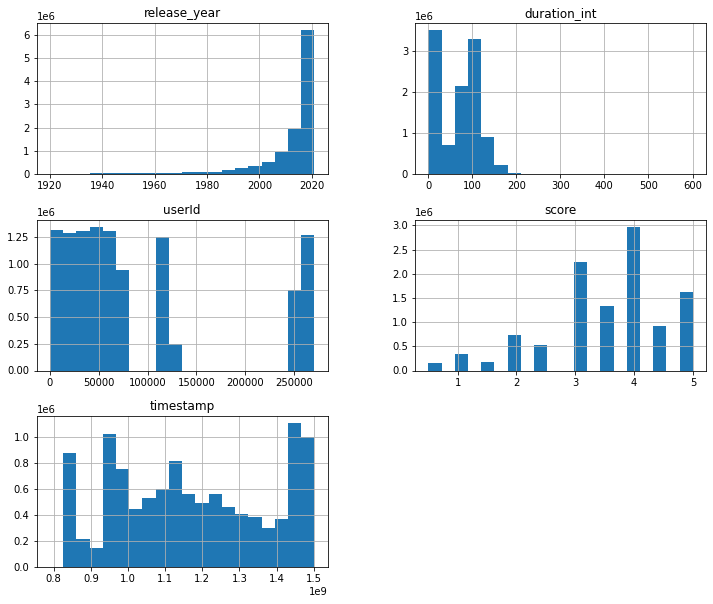

In [8]:
#Reviso campos numericos, se puede observar que la mayoria de contenido rondan el año 2020 
#la mayoria de las peliculas duran al rededor de 2hs
#la mayoria de usuarios califica el contenido en 3 y 4 puntos

df_completo.hist(bins=20, figsize=(12,10))

<AxesSubplot: >

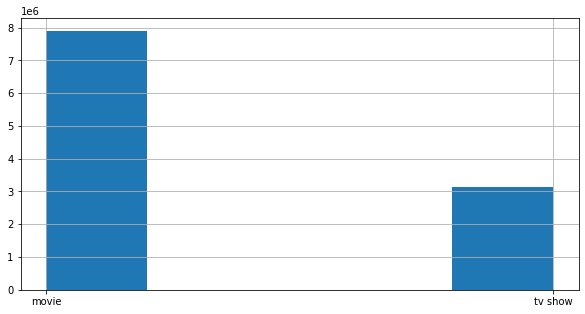

In [9]:
#Mayor contenido
df_completo.type.hist(bins=5, figsize=(10,5))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13484\36195395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_completo.corr()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13484\36195395.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_completo.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

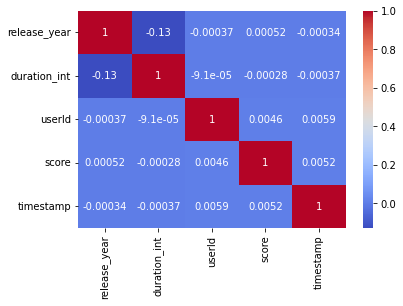

In [10]:
# Busco correlaciones entre los campor numericos
df_completo.corr()
sns.heatmap(df_completo.corr(), annot=True, cmap='coolwarm')

In [13]:
df_completo.dtypes

id                object
show_id           object
type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
duration_int     float64
duration_type     object
userId             int64
score            float64
timestamp          int64
movieId           object
dtype: object

array([[<AxesSubplot: title={'center': 'release_year'}>,
        <AxesSubplot: title={'center': 'duration_int'}>]], dtype=object)

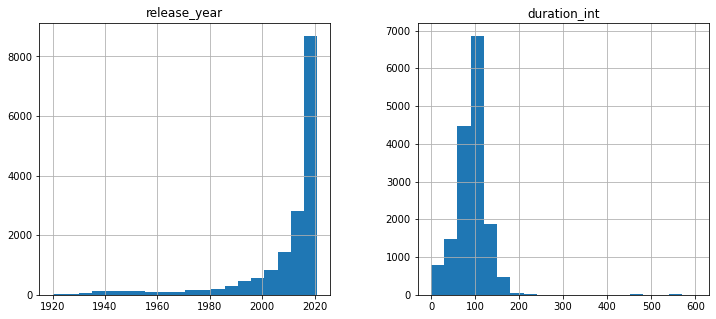

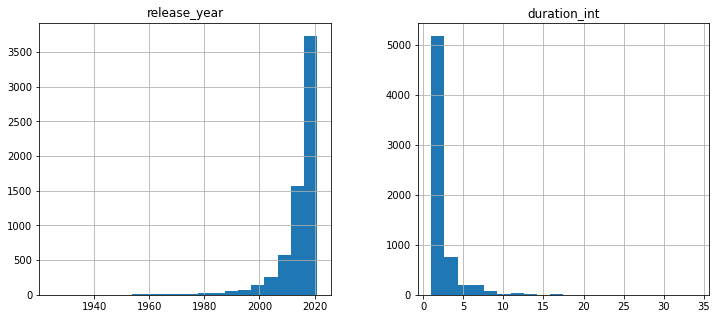

In [36]:
#separo el tipo de contenido 
#la mayoria de las series tienen menos de 5 temporadas
#si bien la mayoria del contenido es del año 2000 en adelante, se puede observar que hay peliculas desde 1920
peliculas= total_plataformas[total_plataformas.type=='movie']
tv_show=total_plataformas[total_plataformas.type=='tv show']
peliculas.hist(bins=20, figsize=(12,5))
tv_show.hist(bins=20, figsize=(12,5))


<AxesSubplot: xlabel='duration_int'>

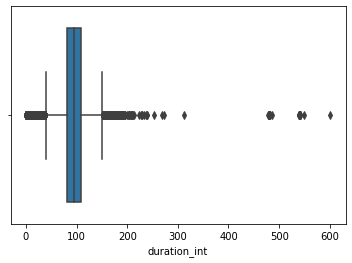

In [37]:
sns.boxplot(x='duration_int', data=peliculas)
# Se observan outliers en el tiempo de duracion de peliculas desde 0hs hasta 10hs

<AxesSubplot: xlabel='score'>

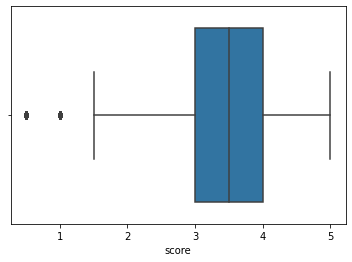

In [39]:
sns.boxplot(x='score', data=total_rating)
# la mayoria de usuarios votan entre 3 y 4 

In [21]:
# usuarios únicos

print(len(total_rating['userId'].unique()))

115077


In [23]:
# Calificaciones de contenido por usuario

calificacion_usuarios = total_rating.groupby(['userId']).count()
calificacion_usuarios.head()

,score,timestamp,movieId
userId,,,
1,27,27,27
2,22,22,22
3,10,10,10
4,62,62,62
5,26,26,26


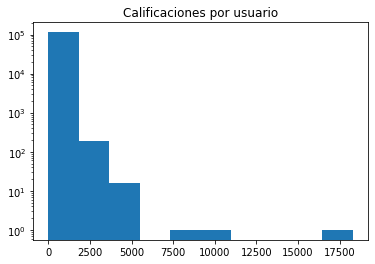

In [46]:
plt.hist(calificacion_usuarios.score, log=True)
plt.title('Calificaciones por usuario')
plt.show()

In [66]:
#cantidad de calificaciones por movieId
cantidad_calificaciones = total_rating.groupby(['movieId']).count()
cantidad_calificaciones.head()

,userId,score,timestamp
movieId,,,
as1,502,502,502
as10,513,513,513
as100,430,430,430
as1000,485,485,485
as1001,469,469,469


In [130]:
#Las 5 peliculas/series mas calificadas
top_mas_score= cantidad_calificaciones.sort_values('score', ascending=False).head()
top_mas_score.reset_index(drop=False, inplace=True) #acomodo el indice
top_mas_score.rename({'score' : 'puntuaciones'} , axis= 1, inplace=True) #renombro columna
top_mas_score.rename({'movieId':'id'},axis=1, inplace=True)
top_mas_score


,id,userId,puntuaciones,timestamp
0,as4197,576,576,576
1,as9065,560,560,560
2,ns7279,558,558,558
3,as848,558,558,558
4,hs2360,556,556,556


In [141]:
mask_top= total_plataformas[['id','type','title','listed_in']][total_plataformas.id.isin(top_mas_score.id)]
title_topmas= top_mas_score.merge(mask_top, on='id', how='left')
title_topmas[['id','type','title','puntuaciones','listed_in']]



,id,type,title,puntuaciones,listed_in
0,as4197,movie,from other worlds,576,"comedy, science fiction"
1,as9065,movie,the organization,560,"action, drama"
2,ns7279,movie,"leapfrog: sing-along, read-along",558,children & family movies
3,as848,tv show,superbook,558,"animation, faith and spirituality, kids"
4,hs2360,tv show,dietland,556,"comedy, drama"


In [142]:
#Las 5 peliculas/series menos calificadas
top_menos_score= cantidad_calificaciones.sort_values('score',).head()
top_menos_score.reset_index(drop=False, inplace=True) #acomodo el indice
top_menos_score.rename({'score' : 'puntuaciones'} , axis= 1, inplace=True) #renombro columna
top_menos_score.rename({'movieId':'id'},axis=1, inplace=True)
mask_top= total_plataformas[['id','type','title','listed_in']][total_plataformas.id.isin(top_menos_score.id)]
title_topmenos= top_menos_score.merge(mask_top, on='id', how='left')
title_topmenos[['id','type','title','puntuaciones','listed_in']]

,id,type,title,puntuaciones,listed_in
0,as4940,movie,mitzi (nbc 1968),396,"arts, entertainment, and culture, music videos..."
1,ns2144,movie,"rob schneider: asian momma, mexican kids",399,stand-up comedy
2,hs1711,movie,i am alone,401,"action, adventure, horror"
3,ns6535,movie,cop and a half: new recruit,402,"children & family movies, comedies"
4,hs599,tv show,dave,404,"comedy, sitcom"
